In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

train_df = pd.read_csv('nsl-kdd/KDDTrain+.txt')
test_df = pd.read_csv('nsl-kdd/KDDTest+.txt')

In [2]:
print(train_df, test_df)

        0  tcp  ftp_data   SF   491   0.1  0.2  0.3  0.4  0.5  ...  0.17  \
0       0  udp     other   SF   146     0    0    0    0    0  ...  0.00   
1       0  tcp   private   S0     0     0    0    0    0    0  ...  0.10   
2       0  tcp      http   SF   232  8153    0    0    0    0  ...  1.00   
3       0  tcp      http   SF   199   420    0    0    0    0  ...  1.00   
4       0  tcp   private  REJ     0     0    0    0    0    0  ...  0.07   
...    ..  ...       ...  ...   ...   ...  ...  ...  ...  ...  ...   ...   
125967  0  tcp   private   S0     0     0    0    0    0    0  ...  0.10   
125968  8  udp   private   SF   105   145    0    0    0    0  ...  0.96   
125969  0  tcp      smtp   SF  2231   384    0    0    0    0  ...  0.12   
125970  0  tcp    klogin   S0     0     0    0    0    0    0  ...  0.03   
125971  0  tcp  ftp_data   SF   151     0    0    0    0    0  ...  0.30   

        0.03  0.17.1  0.00.6  0.00.7  0.00.8  0.05  0.00.9   normal  20  
0       0.60 

In [3]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

In [4]:
train_df.columns = columns
test_df.columns = columns

In [5]:
df = pd.concat([train_df, test_df], ignore_index=True)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148510,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
148511,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
148512,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15
148513,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [6]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148515 entries, 0 to 148514
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148515 non-null  int64  
 1   protocol_type                148515 non-null  object 
 2   service                      148515 non-null  object 
 3   flag                         148515 non-null  object 
 4   src_bytes                    148515 non-null  int64  
 5   dst_bytes                    148515 non-null  int64  
 6   land                         148515 non-null  int64  
 7   wrong_fragment               148515 non-null  int64  
 8   urgent                       148515 non-null  int64  
 9   hot                          148515 non-null  int64  
 10  num_failed_logins            148515 non-null  int64  
 11  logged_in                    148515 non-null  int64  
 12  num_compromised              148515 non-null  int64  
 13 

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,148515.0,276.783032,2.460699e+03,0.0,0.00,0.00,0.00,5.771500e+04
src_bytes,148515.0,40228.487729,5.409648e+06,0.0,0.00,44.00,278.00,1.379964e+09
dst_bytes,148515.0,17089.083722,3.703550e+06,0.0,0.00,0.00,571.00,1.309937e+09
land,148515.0,0.000215,1.467724e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,148515.0,0.020523,2.400707e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,148515.0,0.000202,1.941721e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,148515.0,0.189382,2.013173e+00,0.0,0.00,0.00,0.00,1.010000e+02
num_failed_logins,148515.0,0.004323,7.224871e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,148515.0,0.402794,4.904617e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,148515.0,0.255065,2.223152e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [9]:
df[df.index.duplicated()]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level


In [10]:
df['attack'].value_counts()

normal             77053
neptune            45870
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
land                  25
multihop              25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
loadmodule            11
ftp_write             11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
spy                    2
worm                   2
sqlattack              2
udpstorm               2


Text(0, 0.5, 'Vrsta napada')

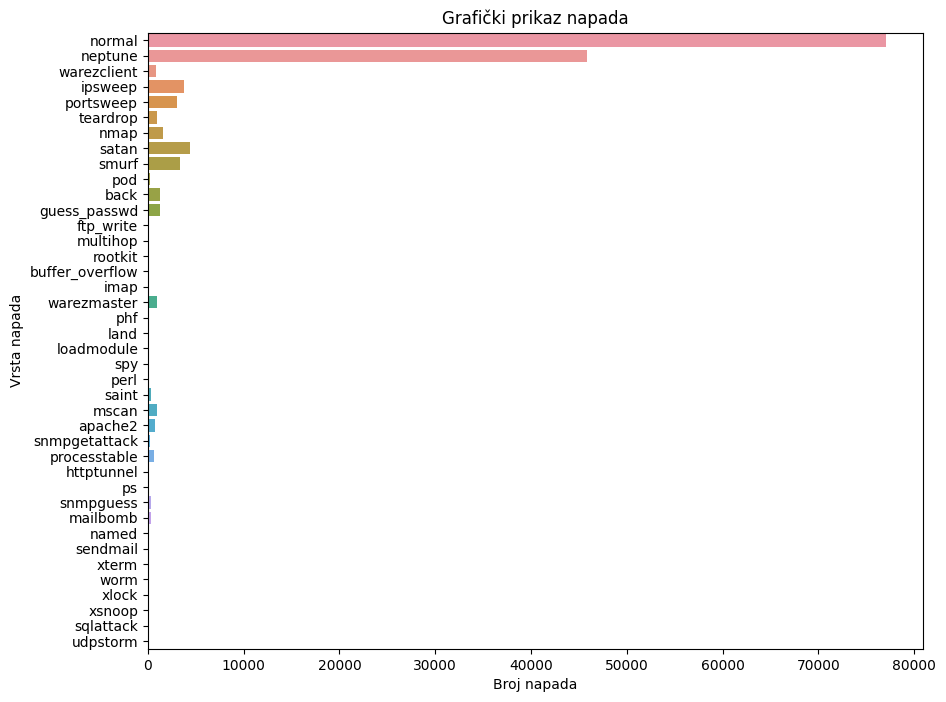

In [11]:
plt.figure(figsize=(10, 8))
attack_dist = sns.countplot(data=df, y='attack')
plt.title('Grafički prikaz napada')
plt.xlabel('Broj napada')
plt.ylabel('Vrsta napada')

In [12]:
attacks_per_protocol = pd.crosstab(df.attack, df.protocol_type)
attacks_per_protocol

protocol_type,icmp,tcp,udp
attack,,,
apache2,0,737,0
back,0,1315,0
buffer_overflow,0,50,0
ftp_write,0,11,0
guess_passwd,0,1284,0
httptunnel,0,133,0
imap,0,12,0
ipsweep,3258,482,0
land,0,25,0


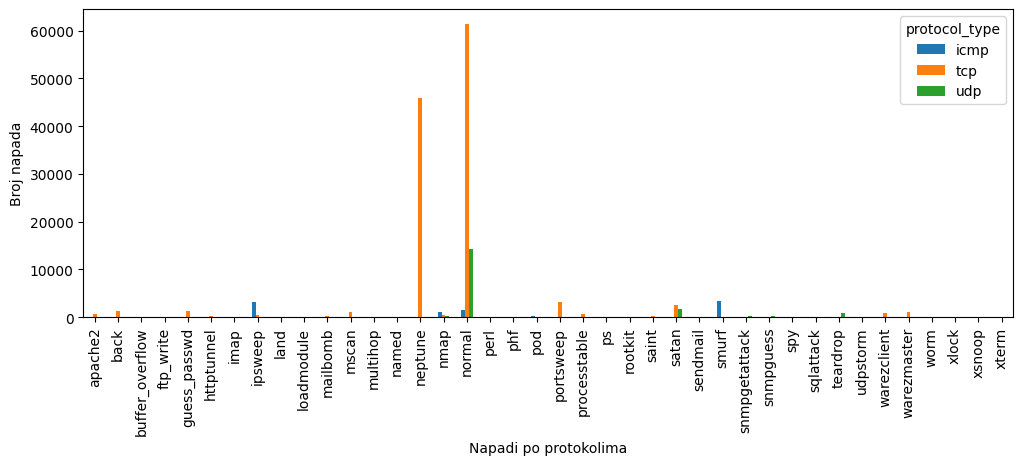

In [13]:
"""def plot_crosstab(ct, w, h, x_label, y_label, leg):
    p = ct.plot(kind="bar", figsize=(w, h), xlabel=x_label, ylabel=y_label)
    if leg == 0:
        p.get_legend().remove()
"""
app = attacks_per_protocol.plot(kind='bar', figsize=(12, 4), xlabel="Napadi po protokolima", ylabel="Broj napada")

In [14]:
#grupiranje napada prema dokumentaciji autora dataseta
df['attack_classes'] = df.loc[:, 'attack']
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_classes
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,neptune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148510,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21,normal
148511,0,tcp,http,SF,317,938,0,0,0,0,...,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21,normal
148512,0,tcp,http,SF,54540,8314,0,0,0,2,...,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15,back
148513,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal


In [15]:
def attack_label(dataframe):
  dataframe.attack_classes.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'DoS', inplace=True)
  dataframe.attack_classes.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L', inplace=True)      
  dataframe.attack_classes.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'probe', inplace=True)
  dataframe.attack_classes.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R', inplace=True)
    
attack_label(df)
df['attack_classes']

0         normal
1            DoS
2         normal
3         normal
4            DoS
           ...  
148510    normal
148511    normal
148512       DoS
148513    normal
148514     probe
Name: attack_classes, Length: 148515, dtype: object

In [16]:
attacks_per_protocol2 = pd.crosstab(df.attack_classes, df.protocol_type)
attacks_per_protocol2

protocol_type,icmp,tcp,udp
attack_classes,,,
DoS,3553,48927,906
R2L,4,3362,514
U2R,0,116,3
normal,1402,61441,14210
probe,4375,7721,1981


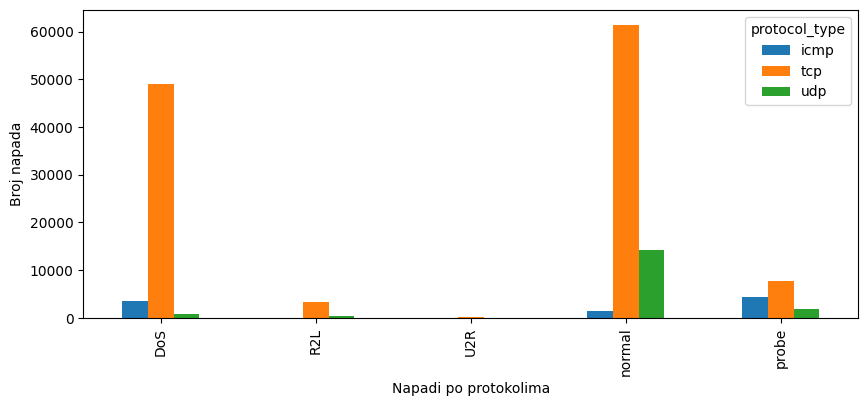

In [17]:
app2 = attacks_per_protocol2.plot(kind='bar', figsize=(10, 4), xlabel="Napadi po protokolima", ylabel="Broj napada")

In [18]:
#grafički prikaz napada po individualnim protokolima
icmp_att = attacks_per_protocol2.icmp
tcp_att = attacks_per_protocol2.tcp
udp_att = attacks_per_protocol2.udp

pies = [icmp_att, tcp_att, udp_att]

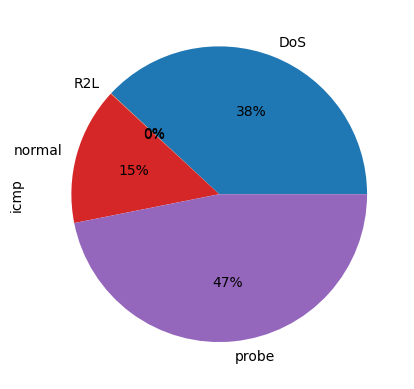

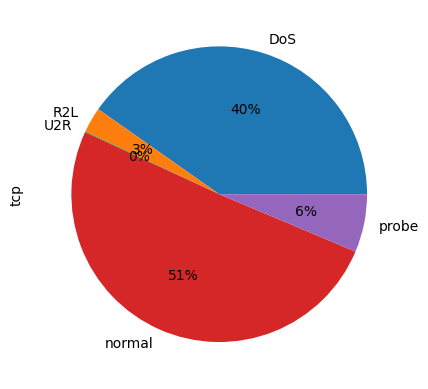

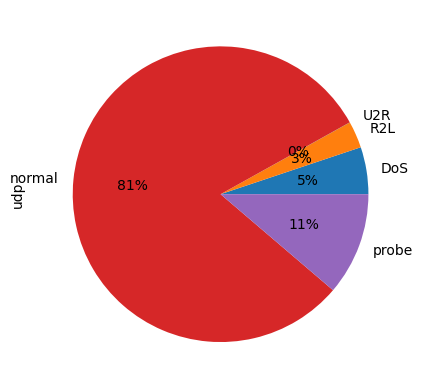

In [19]:
for p in pies:
    p.plot.pie(autopct='%.0f%%')
    plt.show()

Text(0, 0.5, 'Broj napada')

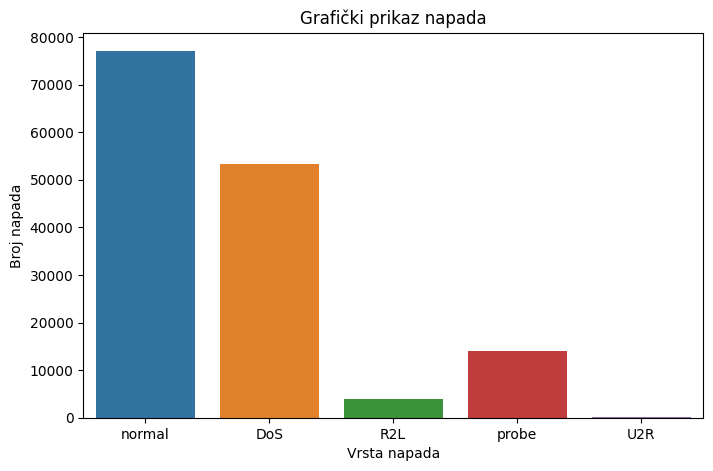

In [20]:
#također može se prikazati bar plot s kategorijama napada
plt.figure(figsize=(8, 5))
attack_dist2 = sns.countplot(data=df, x='attack_classes')
plt.title('Grafički prikaz napada')
plt.xlabel('Vrsta napada')
plt.ylabel('Broj napada')

In [21]:
#kraj analize

In [22]:
#početak modeliranja
#stupce čiji podaci nisu numeričkog tipa će se dekodirati pomoću dummies
to_encode = ['protocol_type', 'service', 'flag']
encode = pd.get_dummies(df[to_encode], dtype=int)
df = df.join(encode)

for i in to_encode:
    df.drop(i, axis=1, inplace=True)
    
df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148510,0,794,333,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
148511,0,317,938,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
148512,0,54540,8314,0,0,0,2,0,1,1,...,0,0,0,0,0,0,0,0,1,0
148513,0,42,42,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
attack_flag = df.attack.map(lambda a: 0 if a == 'normal' else 1)
df['attack_flag'] = attack_flag
df.drop(['attack_classes', 'attack'], axis=1, inplace=True)
df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack_flag
0,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148510,0,794,333,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
148511,0,317,938,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
148512,0,54540,8314,0,0,0,2,0,1,1,...,0,0,0,0,0,0,0,1,0,1
148513,0,42,42,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
#koristit ce se sljedeci algoritmi: Naive Bayes, Knn i decision tree

In [25]:
#također testirat ce se na 2 seta podataka:
# 1. podaci s korelacijom 0.5 i vise s ciljnom varijablom 'attack flag'
# 2. podaci s korelacijom izmedju 0.3 i 0.6 s ^
df1 = df.copy()

In [26]:
df.corr()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack_flag
duration,1.000000,0.068959,0.034056,-0.001651,-0.009616,0.002426,0.000664,0.000525,-0.064476,0.043998,...,-0.008410,0.033137,0.475495,-0.064633,-0.005742,0.006680,0.007455,-0.057909,-0.005420,0.052119
src_bytes,0.068959,1.000000,0.000212,-0.000109,-0.000633,-0.000074,0.000347,-0.000443,-0.003286,-0.000079,...,0.006003,0.176252,-0.000459,-0.004273,0.000050,-0.000209,0.000015,-0.005609,-0.000358,0.005457
dst_bytes,0.034056,0.000212,1.000000,-0.000068,-0.000394,0.000179,-0.000297,0.000096,-0.002635,0.001253,...,-0.000572,-0.000123,0.026239,-0.002651,0.000232,0.000213,-0.000197,-0.004202,-0.000222,0.003583
land,-0.001651,-0.000109,-0.000068,1.000000,-0.001255,-0.000153,-0.001381,-0.000878,-0.012056,-0.000168,...,-0.001855,-0.000390,-0.002140,0.025549,-0.000749,-0.000454,-0.000658,-0.018160,-0.000707,0.008817
wrong_fragment,-0.009616,-0.000633,-0.000394,-0.001255,1.000000,-0.000889,-0.008042,-0.005115,-0.070208,-0.000981,...,-0.010805,-0.002274,-0.012461,-0.049122,-0.004364,-0.002645,-0.003833,0.069108,-0.004119,0.081697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
flag_S2,0.006680,-0.000209,0.000213,-0.000454,-0.002645,-0.000322,0.008344,-0.001851,0.028785,-0.000345,...,-0.003910,-0.000823,-0.004509,-0.017776,-0.001579,1.000000,-0.001387,-0.038269,-0.001491,-0.023252
flag_S3,0.007455,0.000015,-0.000197,-0.000658,-0.003833,-0.000466,-0.003545,0.009813,-0.021485,-0.000474,...,-0.005667,-0.001193,-0.006536,-0.025765,-0.002289,-0.001387,1.000000,-0.055468,-0.002161,0.031804
flag_SF,-0.057909,-0.005609,-0.004202,-0.018160,0.069108,0.008410,0.072325,0.031021,0.622421,0.007126,...,-0.156343,-0.032904,-0.180318,-0.710804,-0.063147,-0.038269,-0.055468,1.000000,-0.059604,-0.727670
flag_SH,-0.005420,-0.000358,-0.000222,-0.000707,-0.004119,-0.000501,-0.004394,-0.002883,-0.039571,-0.000553,...,-0.006090,-0.001282,-0.007024,-0.027686,-0.002460,-0.001491,-0.002161,-0.059604,1.000000,0.049472


In [27]:
to_drop = []

dfc = df.copy()
for x in dfc:
    if abs(dfc[x].corr(dfc['attack_flag'])) < 0.4:
        to_drop.append(x)

to_drop

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'is_host_login',
 'is_guest_login',
 'srv_count',
 'rerror_rate',
 'srv_rerror_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'level',
 'protocol_type_icmp',
 'protocol_type_tcp',
 'protocol_type_udp',
 'service_IRC',
 'service_X11',
 'service_Z39_50',
 'service_aol',
 'service_auth',
 'service_bgp',
 'service_courier',
 'service_csnet_ns',
 'service_ctf',
 'service_daytime',
 'service_discard',
 'service_domain',
 'service_domain_u',
 'service_echo',
 'service_eco_i',
 'service_ecr_i',
 'service_efs',
 'service_exec',
 'service_finger',
 'service_ftp',
 'service_ftp_data',
 'service_gopher',

In [28]:
df.drop(to_drop, axis=1, inplace=True)
df.corr()

,logged_in,num_outbound_cmds,count,serror_rate,srv_serror_rate,same_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,service_http,service_private,flag_S0,flag_SF,attack_flag
logged_in,1.000000,NaN,-0.530782,-0.466502,-0.464962,0.590631,0.618146,0.598825,-0.465815,-0.468539,0.708417,-0.383625,-0.471868,0.622421,-0.664124
num_outbound_cmds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count,-0.530782,NaN,1.000000,0.410502,0.406669,-0.616397,-0.382077,-0.458139,0.413588,0.415763,-0.419461,0.224551,0.419319,-0.500409,0.524102
serror_rate,-0.466502,NaN,0.410502,1.000000,0.991507,-0.711260,-0.526429,-0.588133,0.974696,0.976030,-0.346857,0.296249,0.972713,-0.723165,0.588480
srv_serror_rate,-0.464962,NaN,0.406669,0.991507,1.000000,-0.707233,-0.523997,-0.585004,0.970802,0.981982,-0.346096,0.294324,0.976825,-0.720535,0.586642
same_srv_rate,0.590631,NaN,-0.616397,-0.711260,-0.707233,1.000000,0.707823,0.791012,-0.714357,-0.718170,0.485428,-0.425363,-0.719406,0.815434,-0.708907
dst_host_srv_count,0.618146,NaN,-0.382077,-0.526429,-0.523997,0.707823,1.000000,0.898247,-0.543460,-0.537753,0.723781,-0.378061,-0.521220,0.662918,-0.692585
dst_host_same_srv_rate,0.598825,NaN,-0.458139,-0.588133,-0.585004,0.791012,0.898247,1.000000,-0.606718,-0.599095,0.674606,-0.414810,-0.582012,0.729459,-0.667630
dst_host_serror_rate,-0.465815,NaN,0.413588,0.974696,0.970802,-0.714357,-0.543460,-0.606718,1.000000,0.982812,-0.366221,0.296219,0.969597,-0.702182,0.589941
dst_host_srv_serror_rate,-0.468539,NaN,0.415763,0.976030,0.981982,-0.718170,-0.537753,-0.599095,0.982812,1.000000,-0.362011,0.300668,0.975522,-0.706696,0.593696


In [29]:
df.drop('num_outbound_cmds', axis=1, inplace=True)
df1.drop('num_outbound_cmds', axis=1, inplace=True)

In [30]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #random_state=42)

In [31]:
#naive bayes
cnb = CategoricalNB()
cnb.fit(X_train, y_train)
cnb_predict=cnb.predict(X_test)
print(accuracy_score(y_test, cnb_predict))
print(classification_report(y_test, cnb_predict))

0.8799236898215689
              precision    recall  f1-score   support

           0       0.83      0.97      0.89     22984
           1       0.96      0.78      0.86     21571

    accuracy                           0.88     44555
   macro avg       0.89      0.88      0.88     44555
weighted avg       0.89      0.88      0.88     44555



<AxesSubplot:>

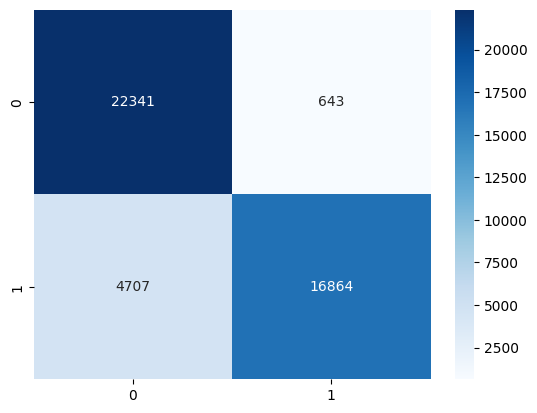

In [32]:
conf_matrix_cnb=confusion_matrix(y_test, cnb_predict)
sns.heatmap(conf_matrix_cnb, annot=True, cmap='Blues', fmt="d")

In [33]:
#dtc
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
dtc_predict=dtc.predict(X_test)
print(accuracy_score(y_test, dtc_predict))
print(classification_report(y_test, dtc_predict))

0.9523959151610369
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     22984
           1       0.96      0.94      0.95     21571

    accuracy                           0.95     44555
   macro avg       0.95      0.95      0.95     44555
weighted avg       0.95      0.95      0.95     44555



<AxesSubplot:>

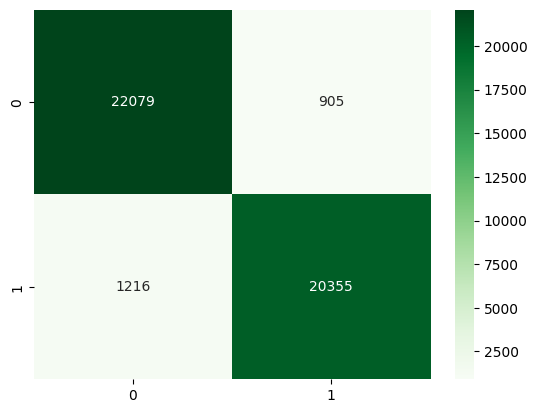

In [34]:
conf_matrix_dtc=confusion_matrix(y_test, dtc_predict)
sns.heatmap(conf_matrix_dtc, annot=True, cmap='Greens', fmt="d")

In [35]:
#knn
#racunanje k-vrijednosti prema nacelu k=sqrt(n)

n=int(math.sqrt(len(df)))

knn = KNeighborsClassifier(n_neighbors=n)

knn.fit(X_train, y_train)
knn_predict=knn.predict(X_test)
print(accuracy_score(y_test, knn_predict))
print(classification_report(y_test, knn_predict))

/home/alen-wsl/anaconda3/envs/dsenv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.888632027830771
              precision    recall  f1-score   support

           0       0.84      0.97      0.90     22984
           1       0.96      0.80      0.87     21571

    accuracy                           0.89     44555
   macro avg       0.90      0.89      0.89     44555
weighted avg       0.90      0.89      0.89     44555



<AxesSubplot:>

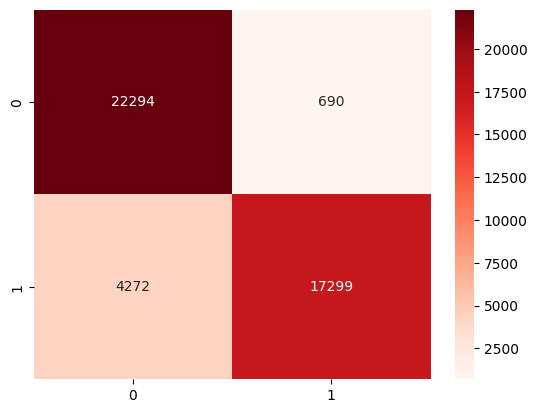

In [36]:
conf_matrix_knn=confusion_matrix(y_test, knn_predict)
sns.heatmap(conf_matrix_knn, annot=True, cmap='Reds', fmt="d")

In [37]:
df1

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack_flag
0,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148510,0,794,333,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
148511,0,317,938,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
148512,0,54540,8314,0,0,0,2,0,1,1,...,0,0,0,0,0,0,0,1,0,1
148513,0,42,42,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [38]:
#testiranje s podacima s korelacijom izmedju 0.3 i 0.6 naspram ciljne varijable

In [39]:
to_drop = []

dfc1 = df1.copy()
for x in dfc1:
    if abs(dfc1[x].corr(dfc1['attack_flag'])) < 0.2:
        to_drop.append(x)
    elif abs(dfc1[x].corr(dfc1['attack_flag'])) > 0.55:
        to_drop.append(x)

#ciljna varijabla 'attack_flag' ce se naci u arrayu za izbacivanje jer ima korelaciju 1 sa sobom u matrici
#stoga ju treba izbaciti
to_drop = to_drop[:-1]        
to_drop

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'is_host_login',
 'is_guest_login',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'srv_diff_host_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'protocol_type_icmp',
 'protocol_type_tcp',
 'service_IRC',
 'service_X11',
 'service_Z39_50',
 'service_aol',
 'service_auth',
 'service_bgp',
 'service_courier',
 'service_csnet_ns',
 'service_ctf',
 'service_daytime',
 'service_discard',
 'service_domain',
 'service_echo',
 'service_eco_i',
 'service_ecr_i',
 'service_efs',
 'service_exec',
 'service_finger',
 'service_ftp',
 'service_ftp_data',
 'service_gopher',
 'service_harvest',
 'service_host

In [40]:
df1.drop(to_drop, axis=1, inplace=True)
df1.corr()

,count,rerror_rate,srv_rerror_rate,diff_srv_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,protocol_type_udp,service_domain_u,service_private,flag_REJ,attack_flag
count,1.000000,0.201788,0.202420,0.233640,0.446909,0.198273,0.221763,0.210376,0.023552,0.016395,0.056575,0.224551,0.246335,0.524102
rerror_rate,0.201788,1.000000,0.986095,0.290208,0.109615,0.343824,0.916886,0.957356,-0.088732,-0.148848,-0.108840,0.204554,0.828599,0.300652
srv_rerror_rate,0.202420,0.986095,1.000000,0.292335,0.110743,0.344914,0.906332,0.965605,-0.084175,-0.148631,-0.108501,0.206104,0.837602,0.299117
diff_srv_rate,0.233640,0.290208,0.292335,1.000000,0.177620,0.519573,0.250609,0.300272,-0.092886,0.018856,-0.071251,0.144793,0.308323,0.215801
dst_host_count,0.446909,0.109615,0.110743,0.177620,1.000000,0.141052,0.116049,0.105799,0.000444,0.164698,0.120808,0.250671,0.069043,0.373455
dst_host_diff_srv_rate,0.198273,0.343824,0.344914,0.519573,0.141052,1.000000,0.390398,0.353639,-0.165877,0.098470,-0.094126,0.226295,0.265248,0.244649
dst_host_rerror_rate,0.221763,0.916886,0.906332,0.250609,0.116049,0.390398,1.000000,0.921346,-0.084358,-0.111242,-0.109358,0.202968,0.809459,0.300740
dst_host_srv_rerror_rate,0.210376,0.957356,0.965605,0.300272,0.105799,0.353639,0.921346,1.000000,-0.070923,-0.149226,-0.108935,0.213117,0.836434,0.297965
level,0.023552,-0.088732,-0.084175,-0.092886,0.000444,-0.165877,-0.084358,-0.070923,1.000000,-0.121460,-0.007211,-0.004667,0.031644,-0.376258
protocol_type_udp,0.016395,-0.148848,-0.148631,0.018856,0.164698,0.098470,-0.111242,-0.149226,-0.121460,1.000000,0.730000,0.091000,-0.123326,-0.211383


In [41]:
#podjela podataka

X2 = df1.iloc[:,:-1]
y2 = df1.iloc[:,-1]

#train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2) #random_state=42)

In [42]:
#naive bayes
cnb2 = CategoricalNB()
cnb2.fit(X2_train, y2_train)
cnb_predict2=cnb2.predict(X2_test)
print(accuracy_score(y2_test, cnb_predict2))
print(classification_report(y2_test, cnb_predict2))

0.9025687640979025
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     15254
           1       0.92      0.87      0.90     14449

    accuracy                           0.90     29703
   macro avg       0.90      0.90      0.90     29703
weighted avg       0.90      0.90      0.90     29703



<AxesSubplot:>

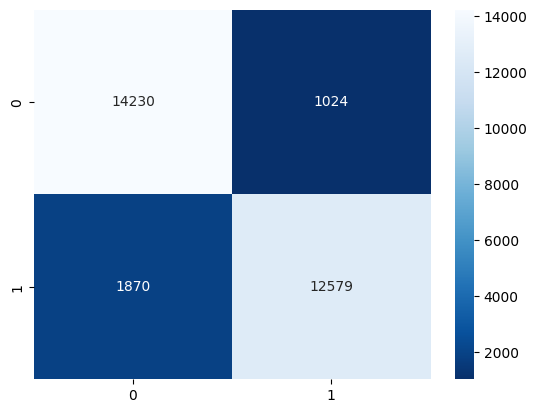

In [50]:
#konfuzijska matrica
conf_matrix_cnb2=confusion_matrix(y2_test, cnb_predict2)
sns.heatmap(conf_matrix_cnb2, annot=True, cmap='Blues_r', fmt="d")

In [54]:
# 2. stablo odlucivanja 
dtc2 = DecisionTreeClassifier(random_state=1)
dtc2.fit(X2_train, y2_train)
dtc_predict2=dtc2.predict(X2_test)
print(accuracy_score(y2_test, dtc_predict2))
print(classification_report(y2_test, dtc_predict2))

0.9909436757229909
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15254
           1       0.99      0.99      0.99     14449

    accuracy                           0.99     29703
   macro avg       0.99      0.99      0.99     29703
weighted avg       0.99      0.99      0.99     29703



<AxesSubplot:>

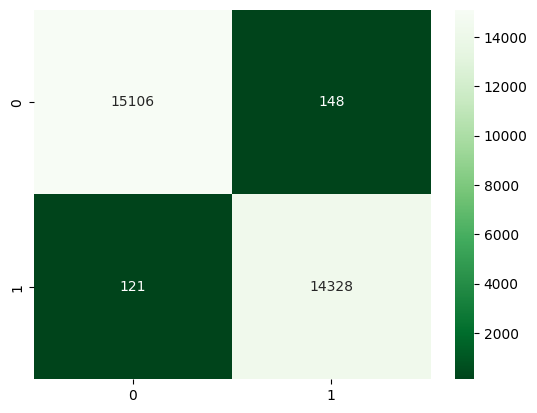

In [45]:
conf_matrix_dtc2=confusion_matrix(y2_test, dtc_predict2)
sns.heatmap(conf_matrix_dtc2, annot=True, cmap='Greens_r', fmt="d")

In [46]:
#knn
#prethodno je definirana vrijednost k kod prvog knn objekta

knn2 = KNeighborsClassifier(n_neighbors=n)

knn2.fit(X2_train, y2_train)
knn_predict2=knn2.predict(X2_test)
print(accuracy_score(y2_test, knn_predict2))
print(classification_report(y2_test, knn_predict2))

/home/alen-wsl/anaconda3/envs/dsenv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9037134296199038
              precision    recall  f1-score   support

           0       0.92      0.89      0.90     15254
           1       0.89      0.92      0.90     14449

    accuracy                           0.90     29703
   macro avg       0.90      0.90      0.90     29703
weighted avg       0.90      0.90      0.90     29703



<AxesSubplot:>

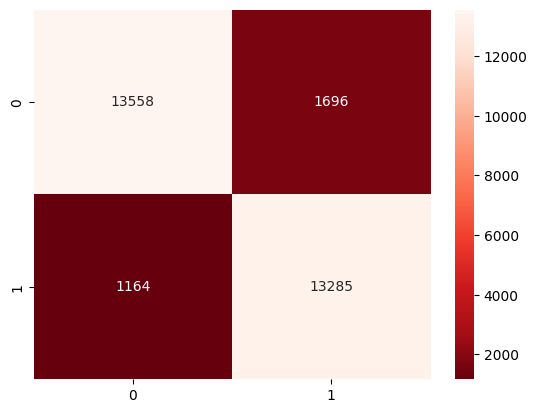

In [47]:
conf_matrix_knn2=confusion_matrix(y2_test, knn_predict2)
sns.heatmap(conf_matrix_knn2, annot=True, cmap='Reds_r', fmt="d")